# G01

# Cristina Molina

# Jaime del Rey

# Indice
- [Vectorizer ngramas(1,1), binary = false](#Vectorizer-ngramas-(1,1))
- [Distancia del coseno ngramas(1,1), binary = false](#Calculo-de-distancia-del-coseno-ngramas-(1,1))
- [Cálculo de la precisión ngramas(1,1), binary = false](#Calculo-de-la-precisión-ngramas-(1,1))
- [Conclusiones ngramas(1,1) con frecuencia](#Conclusiones-ngramas-(1,1)-con-frecuencia)
- [Transformación TF/IDF](#TF/IDF)
- [Cálculo de la precisión TF/IDF](#Cálculo-de-la-precisión)
- [ Conclusiones ngrama(1,1) TF/IDF](#Conclusiones)

# A interés del/a corrector/a

Para una mayor comprensión del Notebook hemos desglosado los pasos en los que se pide crear estructuras de datos mostrando resultados en la creación de varias estructuras llevando cada una a la siguiente hasta el resultado final. Por ello encontrará, en este caso, varias matrices cuando podría haberse resuelto con una función y una matriz (o un par de ellas). Consideramos que esto permite una mayor y mejor visualización de el código y los pasos ejecutados.

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd

In [3]:
train_data = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
test_data = fetch_20newsgroups(subset='test')

print("Training texts:", len(train_data.data))
print("Test texts:", len(test_data.data))

Training texts: 11314
Test texts: 7532


In [4]:
import numpy as np
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data:
        print('Mensaje', index, ':', data[index])
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

# Vectorizer ngramas (1,1)

In [5]:
# Abrimos el archivo que contiene el vocabulario
with open('words.txt') as f:
    dictionary = f.read().splitlines()

#Ponemos ngrama (1,1) y binary = False
vectorizer = CountVectorizer(vocabulary=dictionary, stop_words='english', ngram_range = (1,1),binary = False)

train_vector_data = vectorizer.fit_transform(train_data.data)
feature_names= vectorizer.get_feature_names()

test_vector_data = vectorizer.fit_transform(test_data.data)

In [5]:
write_terms(feature_names, test_data.data, test_vector_data, 0)

Mensaje 0 : From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. GANDLER)
Subject: Need info on 88-89 Bonneville
Organization: University at Buffalo
Lines: 10
News-Software: VAX/VMS VNEWS 1.41
Nntp-Posting-Host: ubvmsd.cc.buffalo.edu


 I am a little confused on all of the models of the 88-89 bonnevilles.
I have heard of the LE SE LSE SSE SSEI. Could someone tell me the
differences are far as features or performance. I am also curious to
know what the book value is for prefereably the 89 model. And how much
less than book value can you usually get them for. In other words how
much are they in demand this time of year. I have heard that the mid-spring
early summer is the best time to buy.

			Neil Gandler

Mensaje 0 vectorizado: ['buy' 'confused' 'curious' 'demand' 'differences' 'features' 'heard'
 'year' 'info' 'know' 'le' 'lines' 'model' 'models' 'need' 'organization'
 'performance' 'posting' 'software' 'subject' 'usually' 'value' 'words'] 



In [6]:
classes = len(test_data.target_names)
#el orden que aparece será en que aparezcan en las matrices siguientes
test_data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [8]:
def quetarget ():
    matrix = np.zeros((classes,3), dtype = int)
    '''
    Matriz con los indices de los mensajes seleccionados
    Cada fila de la matriz es una clase/tema y cada columna es el indice de un mensaje perteneciente a dicha clase
    '''
    for i in range (len(test_data.target_names)): #para cada clase
        x = 0
        for j in range (len(test_data.target)):   #para cada mensaje en test
            if (test_data.target[j] == i):        #si la clase del mensaje pertenece a la clase que estamos buscando
                matrix[i,x] = int (j)             #lo almacenamos en el array de dicha clase
                x = x + 1
                if x == 3:                        #cuando lleguemos a 3 mensajes por clase paramos
                    break
    
    return matrix 
    

In [9]:
matrix = quetarget()
#imprimimos los índices de los mensajes que hemos recopilado
print (matrix)

[[  2  14  49]
 [  9  17  20]
 [ 10  15  41]
 [ 24  29  33]
 [ 16  32  37]
 [  1   8  11]
 [ 18  21  38]
 [  0  27  28]
 [ 13  42  50]
 [ 36  53  69]
 [ 56  61  72]
 [ 26  44  48]
 [ 84 109 120]
 [  5  25  52]
 [ 23  34  46]
 [  6   7  87]
 [ 19  58  86]
 [  3  12  22]
 [ 65  66  71]
 [  4  63  73]]


Vamos a comprobar que, en efecto, los mensajes pertenecen a dicha clase.<br> Escogemos una fila al azar y comprobamos su clase. Después buscaremos un mensaje de esa fila y veremos si tiene sentido en esa clase.

In [10]:
test_data.target_names[7]

'rec.autos'

In [11]:
test_data.data[matrix[7,1]]

'From: cadiz@rtsg.mot.com (Jay Cadiz)\nSubject: GTS Headlight Covers\nNntp-Posting-Host: azure5\nOrganization: Motorola Inc., Cellular Infrastructure Group\nDistribution: usa\nLines: 15\n\nI have a 90 Eagle Talon and I wanted a pair of GTS \nHeadlight covers.  Actually, they are turning signal\ncovers since the Talons that year had pop-up lights.\nI went to a auto shop and bought the tail-light \nblackouts for $45, but they did not have the turning\nsignal covers in stock.  I asked how much it would be\nand he told me it would cost me another $40.  I thought\nthis was a bit high for two small pieces of plastic.\nCan anyone find me a cheaper pair or even a used one?\n\n\nJay Cadiz\ncadiz@marble.rtsg.mot.com\nMotorola, Inc.\nArlington Heights, IL\n'

'I wanted a pair of GTS \nHeadlight covers.' / 'I went to a auto shop'

Tienen sentido en dicha clase ya que habla de recambios de coche (faros concretamente)<br> Y el mensaje vectorizado:

In [12]:
# máscara para seleccionar sólo el mensaje en posición index
mask=test_vector_data[matrix[7,1],:]>0
# términos que aparecen en ese mensaje vectorizado
terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
# mostrar términos que aparecen en el mensaje vectorizado
print('Mensaje', matrix[7,1], 'vectorizado:', terminos.compressed(),'\n')

Mensaje 27 vectorizado: ['actually' 'asked' 'auto' 'blackouts' 'bought' 'cellular' 'cheaper'
 'covers' 'distribution' 'group' 'headlight' 'heights' 'year' 'il'
 'infrastructure' 'lights' 'lines' 'organization' 'pair' 'pieces'
 'plastic' 'posting' 'shop' 'signal' 'subject' 'tail' 'talon' 'talons'
 'thought' 'told' 'turning' 'used' 'wanted' 'went'] 



In [13]:
test_data.target_names[1]

'comp.graphics'

In [14]:
test_data.data[matrix[1,1]]

"From: vicente@cenaath.cena.dgac.fr (Martin VICENTE (CENA/SID))\nSubject: Re: 3D input devices\nOriginator: vicente@milou\nKeywords: 3d,input,device\nOrganization: C.E.N.A. (Centre d'Etudes de la Navigation Aerienne)\nLines: 11\n\n\nHello,\ni'm interested in those devices too.\nCould also send me your suggestions.\nThank in advance.\nRegards.\n-- \n\n Martin VICENTE  (E-mail: vicente@cenaath.cena.dgac.fr - Tph: 69 84 56 88)\n  Centre d'Etudes de la Navigation Aerienne   _/_/_/ _/_/       / o \\ / o \\\n  Div. Support Informatique & Developpement      _/ _/  _/      \\___/ \\___/\n"

'3D input devices'/ 'i'm interested in those devices too.'

Refiriendo a las componentes gráficas 3D<br> Y el mensaje vectorizado:

In [15]:
print('Mensaje', 17, 'vectorizado:', ma.array(feature_names, mask = ~((test_vector_data[matrix[1,1],:]>0)[0].toarray())).compressed(),'\n')

Mensaje 17 vectorizado: ['advance' 'device' 'devices' 'etudes' 'hello' 'input' 'interested'
 'keywords' 'lines' 'mail' 'navigation' 'organization' 'originator'
 'regards' 'send' 'subject' 'suggestions' 'support' 'thank' 'tph'] 



In [16]:
#observar como nos da una lista de valores (similitud con cada mensaje)
np.sort(cosine_similarity(test_vector_data[matrix[1,1],:], train_vector_data)[0,:])

array([0.00510689, 0.00531474, 0.00534706, ..., 0.2941742 , 0.29462783,
       0.30935922])

## Calculo de distancia del coseno ngramas (1,1)

Vamos a obtener los valores de la similitud del coseno de cada mensaje y almacenarlos en una matriz.

In [10]:
def matriz_coseno_ord (matrix_indexes, vectorized_messages ,matrix_corpus):
    '''
    MATRIZ CON LA SIMILITUD DEL COSENO DE CADA MENSAJE CON EL RESTO, ORDENADOS LOS VALORES
    Cada fila de la matriz es una clase/tema y cada columna es vector de valores de similaridad del coseno del mensaje
    -matrix_indexes: matriz con los índices de los mensajes de cada clase
    -vectorized_messages: matriz dispersa con los mensajes vectorizados
    -word_corpus: matriz de términos de los textos del corpus
    '''
    m = np.zeros((classes,3),dtype = list)                                                     #creamos una matriz de listas
    for i in range (len(matrix)):                 
        for j in range (3): 
            m[i,j] = -np.sort(-cosine_similarity(vectorized_messages[matrix_indexes[i,j],:], matrix_corpus)[0,:]) #introducimos en la posición 
                                                                                          #del mensaje la lista en orden
                                                                                          #descendente de los valores resultantes
    return m
    

In [11]:
matrix_cos = matriz_coseno_ord(matrix, test_vector_data ,train_vector_data)

In [19]:
matrix_cos

array([[array([0.47172818, 0.45275437, 0.40089186, ..., 0.00695863, 0.00678232,
       0.0056817 ]),
        array([0.35698807, 0.33829381, 0.32846258, ..., 0.00256392, 0.00192067,
       0.00172622]),
        array([0.35750785, 0.34445018, 0.33957856, ..., 0.0031398 , 0.00291994,
       0.00288409])],
       [array([0.31945757, 0.30139814, 0.29933304, ..., 0.00644531, 0.0052652 ,
       0.00433947]),
        array([0.30935922, 0.29462783, 0.2941742 , ..., 0.00534706, 0.00531474,
       0.00510689]),
        array([0.2240599 , 0.19470104, 0.1925731 , ..., 0.00246022, 0.00225674,
       0.00221115])],
       [array([0.46523541, 0.45355737, 0.44001528, ..., 0.00581054, 0.00536794,
       0.00527564]),
        array([0.48532383, 0.4787899 , 0.46948553, ..., 0.00369543, 0.00264455,
       0.00237682]),
        array([0.56011203, 0.51639778, 0.45677344, ..., 0.00611167, 0.00597085,
       0.00549123])],
       [array([0.73372315, 0.51717206, 0.51388338, ..., 0.0036724 , 0.00336765,
       0

Para poder acceder a los mensajes recuperados en orden de relevancia usaremos la matriz con los valores sin ordenar, ya que nos proporciona la posición del mensaje con que tuvo similitud X.

In [12]:
def matriz_coseno (matrix_indexes, vectorized_messages ,matrix_corpus):
    '''
    MATRIZ CON LA SIMILITUD DEL COSENO DE CADA MENSAJE CON EL RESTO, SIN ORDENAR LOS VALORES
    Cada fila de la matriz es una clase/tema y cada columna es vector de valores de similaridad del coseno del mensaje
    -matrix_indexes: matriz con los índices de los mensajes de cada clase
    -word_bag: matriz de términos para calcular la similitud del coseno
    '''
    m = np.zeros((classes,3),dtype = list)                                                     #creamos una matriz de listas
    for i in range (len(matrix)):                 
        for j in range (3): 
            m[i,j] = cosine_similarity(vectorized_messages[matrix[i,j],:], matrix_corpus)[0,:] #introducimos en la posición 
                                                                                          #del mensaje la lista en orden
                                                                                          #descendente de los valores resultantes
    return m
    

In [13]:
mat_cos = matriz_coseno(matrix, test_vector_data ,train_vector_data)

## Calculo de la precisión ngramas (1,1)

In [14]:
def recupera_X(nivel,matriz):
    '''
    MATRIZ, GUARDA PARA CADA MENSAJE LA LISTA DE LOS TOP X RECUPERADOS
    -nivel: nivel de exhaustividad, indica el número de mensajes que se guardan en orden descendente de similitud
    -matriz: matriz con valores de similitud del coseno
    '''
    recs = np.zeros((classes,3),dtype = list)   
    k = []
    for i in range(len(matriz)):                          #para cada fila(clase)
        for j in range(len (matriz[i])):                  #para cada columna(mensaje)
            ordenado = -np.sort(-matriz[i,j])             #ordenamos los valores
            pos = []
            for k in range(nivel):                      #el nº de elementos que se nos pide recuperar
                pos.append((np.where(matriz[i,j] == ordenado[k]))[0][0])   #guardamos la posicion de dicho elemento en el array original
            recs[i][j] = pos
    
    return recs

In [15]:
recupera_3 = recupera_X(3,mat_cos)

In [24]:
recupera_3[0][0]

[3172, 7539, 6909]

In [25]:
(matrix_cos[0][0][0], matrix_cos[0][0][1], matrix_cos[0][0][2]) #3 valores más altos de la clase, corresponden a esos indices

(0.4717281765248632, 0.4527543737072577, 0.4008918628686365)

In [26]:
(train_data.target[3172],train_data.target[7539],train_data.target[6909])

(0, 0, 0)

Como podemos observar la matriz recupera3 nos proporciona los mensajes que recupera cada uno de los elegidos al comienzo. Al acceder al índice de tes_data.target con el valor de alguno de los de la lista, debe darnos el mismo que el de la fila de la matriz que estemos utilizando (recordemos que cada fila de la matriz indica una clase). En este caso el primer mensaje seleccionado para la clase 0 recupera tres mensajes de su misma clase del top 3 según la similitud del coseno.

A continuación, y utilizando esta función, vamos a obtener la precisión con nivel de exhaustividad 3 y 10.

### Nivel de exhaustividad 3

In [16]:
def precision (mat, targets):
    '''
    matriz con la precisión de cada mensaje con respecto a los que ha recuperado
    -mat: matriz con índices de mensajes recuperados (tantos como el nivel de exhaustividad)
    -targets: lista con la clase a la que pertenece cada mensaje
    '''
    matriz_prec = np.zeros((classes,3),dtype = list)
    for i in range (len (mat)):                          #Para cada clase
        for j in range (len (mat[i])):                   #Miro los 3 arrays de posiciones(recuperados por cada mensaje)
            prec = 0
            for k in range(len(mat[i,j])):               #Para cada posición
                if (i == targets[mat[i][j][k]]):              #Si la clase del mensaje en target[k] es la de la fila
                    prec = prec + 1
            matriz_prec[i][j] = round (prec/len(mat[i,j]) , 2)          #Guardamos la precisión en porcentaje usando solo dos decimales
        
    return matriz_prec

In [17]:
precision_3 = precision(recupera_3,train_data.target)

In [18]:
precision_3

array([[1.0, 0.0, 0.0],
       [0.67, 0.0, 0.0],
       [0.67, 0.0, 0.0],
       [1.0, 0.0, 0.67],
       [0.0, 0.0, 0.0],
       [0.0, 0.33, 0.67],
       [0.67, 0.67, 1.0],
       [0.0, 0.0, 1.0],
       [1.0, 1.0, 0.67],
       [1.0, 0.67, 0.67],
       [0.0, 0.67, 1.0],
       [1.0, 0.33, 0.33],
       [0.0, 0.33, 1.0],
       [1.0, 0.33, 1.0],
       [0.67, 1.0, 0.67],
       [1.0, 0.33, 1.0],
       [0.33, 0.67, 0.67],
       [0.33, 0.33, 0.0],
       [0.33, 0.67, 0.0],
       [0.0, 0.33, 0.67]], dtype=object)

### Nivel de exhaustividad 10

In [19]:
recupera_10 = recupera_X(10,mat_cos)

In [20]:
precision_10 = precision(recupera_10,train_data.target)

In [21]:
precision_10

array([[0.7, 0.0, 0.0],
       [0.6, 0.0, 0.0],
       [0.8, 0.1, 0.0],
       [1.0, 0.0, 0.3],
       [0.1, 0.1, 0.0],
       [0.1, 0.4, 0.4],
       [0.5, 0.7, 0.5],
       [0.0, 0.0, 0.9],
       [0.9, 1.0, 0.3],
       [1.0, 0.8, 0.6],
       [0.1, 0.6, 0.9],
       [0.8, 0.2, 0.1],
       [0.1, 0.6, 0.8],
       [1.0, 0.1, 0.5],
       [0.6, 1.0, 0.6],
       [1.0, 0.1, 0.4],
       [0.1, 0.6, 0.5],
       [0.2, 0.6, 0.0],
       [0.3, 0.4, 0.0],
       [0.0, 0.1, 0.4]], dtype=object)

Ahora que tenemos ambas matrices vamos a crear un dataframe para poder ver los resultados con más claridad. Al mismo tiempo calcularemos la media por clase para cada nivel de exhaustividad.

In [33]:
def dfMedias(matP1,matP2,classes):
    '''
    dataframe que, dadas dos matrices, devuelve en [i,j] la media de la fila i en la matriz j
    -matP1: matriz con valores de precisión 1
    -matP2: matriz con valores de precisión 2
    -classes: lista con las clases de los mensajes para identificar las medias
    '''
    l1 = []
    l2 = []
    for i in range (len (matP1)):
        v1 = 0
        v2 = 0
        for j in range (len (matP1[i])):
            v1 += matP1[i][j]
            v2 += matP2[i][j]
        l1.append(v1/len (matP1[i]))
        l2.append(v2/len (matP1[i]))
    df = pd.DataFrame(list(zip(l1, l2)), columns =['3', '10']) 
    df['class'] = classes
    return df

In [34]:
dFrame = dfMedias(precision_3,precision_10,train_data.target_names)

In [35]:
dFrame

,3,10,class
0,0.333333,0.233333,alt.atheism
1,0.223333,0.200000,comp.graphics
2,0.223333,0.300000,comp.os.ms-windows.misc
3,0.556667,0.433333,comp.sys.ibm.pc.hardware
4,0.000000,0.066667,comp.sys.mac.hardware
5,0.333333,0.300000,comp.windows.x
6,0.780000,0.566667,misc.forsale
7,0.333333,0.300000,rec.autos
8,0.890000,0.733333,rec.motorcycles
9,0.780000,0.800000,rec.sport.baseball


In [36]:
dFrame.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
3,20.0,0.489167,0.248586,0.000000,0.333333,0.498333,0.776667,0.89
10,20.0,0.408333,0.202000,0.066667,0.258333,0.383333,0.533333,0.80


## Conclusiones ngramas (1,1) con frecuencia

Se puede apreciar que hay diferencia entre las medias de las clases, podemos ver más diferencias en la precisión media con exhaustividad 10 ya que el número de mensajes a recuperar es mayor. Para una misma clase vemos que, en general, decae el valor en la columna de precisión con exhaustividad 10 y es normal ya que a medida que disminuye la similitud de el mensaje es más probable que el recuperado sea de otra clase. Para aquellas clases con medias muy bajas no varía para la mayor parte el valor entre ambos niveles de exhaustividad.<br> Nuestra hipótesis es que aquellas clases que presentan más ambigüedad y ,por ende, peores valores de similitud van a tener más dificil recuperar mensajes acorde a su clase y van a mostrar un valor de media bajo en ambos casos.<br> Por otro lado aquellas clases que estén mejor definidas tendrán más probabilidad de obtener una mejor precisión media partiendo de un mensaje de su misma clase ya que tendrá mayor similitud, aunque a mayor número de mensajes comparados dicho valor decaiga ya que el vector de valores de similitud está ordenado de manera decreciente (cuantos más recuperemos más probabilidad de que los últimos pertenezcan a otra clase).<br>

Identificamos que los peores resultados se dan en las clases comp.sys.mac.hardware y talk.religion.misc. Vamos a mostrar un mensaje ejemplo (seleccionado al principio) de dicha clase y alguno de los que ha recuperado para intentar entender estos resultados.

- Para la clase comp.sys.mac.hardware si miramos en precision_3 y precision_10 vemos que el último mensaje es el que peor recupera. 
- Para la clase talk.religion.misc se da con el primer mensaje.

Clase a clase mostraremos los mensajes.

In [22]:
def mostar_mal_clasificados(num_mensajes,indice_clase,indice_mensaje,mat_recuperados, targets, target_names):
    '''
    Imprime los mensajes recuperados para un mensaje x que no pertenecen a su misma clase
    -num_mensajes: mensajes a imprimir
    -indice_clase: indice en el que se encuentra la clase (fila) que estamos comprobando en la matriz
    -indice_mensaje: indice en el que se encuentra el mensaje (columna) de la clase que comprobamos
    -mat_recuperados: matriz con los mensajes recuperados para cada mensaje de cada clase. Debe compartir la misma 
                    disposición que los índices insertados
    -targets: lista con la clase a la que pertenece cada mensaje
    -target_names: lista con el nombre de cada clase, debe compartir la indexación de filas de la matriz
    '''
    count = 0
    print("Mensajes mal recuperados:")
    for i in (range(len(mat_recuperados[indice_clase][indice_mensaje]))):
        if(indice_clase != targets[mat_recuperados[indice_clase][indice_mensaje][i]]):
            #imprimimos el mensaje con que se ha confundido
            write_terms(feature_names, None, train_vector_data, mat_recuperados[indice_clase][indice_mensaje][i])
            #mostramos a qué clase pertenece en realidad
            print("Pertenece a la clase: ", target_names[targets[mat_recuperados[indice_clase][indice_mensaje][i]]])
            
            count += 1
            if(count == num_mensajes):
                break
                

### Clase comp.sys.mac.hardware

In [38]:
#Imprimimos el último mensaje de esta clase (fila 4, columna 2) 
print('Mensaje', matrix[4,2], 'vectorizado:', ma.array(feature_names, mask = ~((train_vector_data[matrix[4,2],:]>0)[0].toarray())).compressed(),'\n')

Mensaje 37 vectorizado: ['abiding' 'administration' 'agency' 'agree' 'agreed' 'annoyed' 'annul'
 'appears' 'article' 'assault' 'assessment' 'automatic' 'away'
 'burdensome' 'caliber' 'capabilities' 'cases' 'cause' 'cheap' 'citizens'
 'classes' 'clause' 'clipper' 'college' 'complaints' 'constitutionality'
 'continue' 'control' 'controlled' 'courts' 'cryptography' 'cryptology'
 'days' 'dealers' 'decide' 'degradation' 'designed' 'domestic' 'doubt'
 'drugs' 'easily' 'encryption' 'enforcement' 'enjoying' 'expressly'
 'finger' 'fulfill' 'fulfilled' 'furthermore' 'goal' 'government'
 'governmental' 'grossly' 'hate' 'inadequate' 'introduction' 'invoke'
 'know' 'labeled' 'large' 'le' 'legal' 'length' 'letting' 'like' 'lines'
 'maybe' 'mail' 'majority' 'matters' 'mention' 'mere' 'merged' 'mute'
 'need' 'opinion' 'organization' 'overturned' 'people' 'phone' 'place'
 'presently' 'preventing' 'privacy' 'probably' 'prohibited' 'prohibitory'
 'promotion' 'providing' 'quite' 'real' 'really' 'regulatio

In [39]:
mostar_mal_clasificados(5,4,2,recupera_10,train_data.target,train_data.target_names)

Mensajes mal recuperados:
Mensaje 10966 vectorizado: ['address' 'distribution' 'does' 'keywords' 'lines' 'mail' 'organization'
 'prez' 'southwestern' 'subject' 'thanks'] 

Pertenece a la clase:  talk.politics.misc
Mensaje 2695 vectorizado: ['business' 'color' 'current' 'higher' 'keywords' 'lines' 'look' 'mail'
 'organization' 'patches' 'reply' 'subject' 'thanks'] 

Pertenece a la clase:  comp.windows.x
Mensaje 4696 vectorizado: ['address' 'distribution' 'does' 'lines' 'mail' 'organization' 'send'
 'southwestern' 'subject' 'thanks'] 

Pertenece a la clase:  talk.politics.misc
Mensaje 5571 vectorizado: ['distribution' 'lines' 'mo' 'organization' 'posting' 'st' 'subject'
 'thanks'] 

Pertenece a la clase:  misc.forsale
Mensaje 2331 vectorizado: ['distribution' 'does' 'group' 'know' 'lines' 'organization'
 'southwestern' 'subject' 'thanks'] 

Pertenece a la clase:  sci.electronics


En este caso **la clase con que más se confunde es misc.forsale**. La razón de la poca precisión en la recuperación de este mensaje es la poca presencia de términos que representen su clase (si es que hay alguno que hable de hardware de MAC) frente a la cantidad de términos clave que no la identifican: article', 'assault', 'assessment', 'ruled', 'says', 'terrorists', 'textual', 'unless', 'voice' o 'way', entre otros. Es un mensaje largo, pertenece a una clase que habla de hardware y de todos sus términos no podemos rescatar ninguno _a priori_.<br>
Respecto a los mensajes con los que se ha confundido, tienen una ambigüedad similar, aunque son más cortos. Podemos encontrar el porqué de la similitud de estos mensajes con el original en algunos términos poco relevantes para la clase que estamos tratando.

Imprimimos otro mensaje de la misma clase y lo evaluamos.

In [40]:
#Imprimimos otro mensaje de esta clase (fila 4, columna 1) 
print('Mensaje', matrix[4,1], 'vectorizado:', ma.array(feature_names, mask = ~((train_vector_data[matrix[4,1],:]>0)[0].toarray())).compressed(),'\n')

Mensaje 32 vectorizado: ['accidents' 'cause' 'distribution' 'domestic' 'exploding' 'years' 'lines'
 'organization' 'possible' 'posting' 'subject' 'televisions'
 'understanding'] 



Como en el caso anterior, a pesar de su brevedad, no se muestran palabras clave que representen la clase a la que pertenece.

### Clase talk.religion.misc

In [41]:
#Imprimimos el mensaje
print('Mensaje', matrix[19,1], 'vectorizado:', ma.array(feature_names, mask = ~((test_vector_data[matrix[19,1],:]>0)[0].toarray())).compressed(),'\n')

Mensaje 63 vectorizado: ['according' 'brave' 'bumblepuppy' 'centrifugal' 'commie' 'electro' 'golf'
 'happened' 'il' 'keywords' 'know' 'lines' 'magnetic' 'message'
 'northwestern' 'organization' 'pinko' 'play' 'posting' 'president'
 'subject' 'success' 'views' 'world'] 



In [42]:
mostar_mal_clasificados(5,19,1,recupera_10,train_data.target, train_data.target_names)

Mensajes mal recuperados:
Mensaje 11236 vectorizado: ['according' 'apply' 'article' 'bomb' 'brave' 'bumblepuppy' 'centrifugal'
 'charge' 'charged' 'come' 'commie' 'constitution' 'cool' 'course'
 'crimes' 'current' 'days' 'damage' 'deaths' 'doesn' 'electro' 'extensive'
 'golf' 'hate' 'headed' 'lawyers' 'lines' 'magnetic' 'meant' 'mentioned'
 'merit' 'multiple' 'murder' 'mutation' 'northwestern' 'organization'
 'pinko' 'play' 'police' 'posting' 'property' 'question' 'reason' 'rescue'
 'right' 'shade' 'single' 'study' 'subject' 'teel' 'think' 'times' 'trade'
 'victim' 'views' 'world' 'writes'] 

Pertenece a la clase:  talk.politics.misc
Mensaje 3973 vectorizado: ['distribution' 'keywords' 'lines' 'message' 'organization' 'reply'
 'subject' 'world'] 

Pertenece a la clase:  rec.sport.hockey
Mensaje 4143 vectorizado: ['bbs' 'contained' 'distribution' 'does' 'lines' 'message' 'org'
 'organization' 'planet' 'posting' 'pricing' 'reflect' 'subject' 'value'
 'views' 'way' 'world'] 

Pertenece a 

Con términos como 'centrifugal', 'electro', 'golf', 'magnetic' para un mensaje de una clase que trata de religión no podemos esperar, en efecto, resultados muy acertados a la hora de recuperación de textos. El resto de términos, en general, no aportan ningún identificativo especial que ayude a aumentar los valores de similitud o identifiquen de manera singular a su clase. Para este caso vemos que hay varias clases con las que se mezcla debido a la ambigüedad de la bolsa de términos del mensaje, recuperando de gran variedad de clases.

# TF/IDF

In [23]:
#Transformamos nuestros vectores a TF/IDF
tfidfer = TfidfTransformer()
test_tf_idf = tfidfer.fit_transform(test_vector_data)
train_tf_idf = tfidfer.fit_transform(train_vector_data)

In [24]:
#Reutilizamos la función de la distancia del coseno
matrix_cos_tf_idf = matriz_coseno(matrix, test_vector_data, train_tf_idf)

In [25]:
#Nivel 3 de exhausistividad
recupera3_tfidf =  recupera_X(3,matrix_cos_tf_idf)

In [66]:
recupera3_tfidf[0]

array([list([7539, 3172, 6909]), list([9623, 210, 8795]),
       list([3621, 192, 582])], dtype=object)

## Cálculo de la precisión

In [26]:
precision3_tfidf = precision(recupera3_tfidf,train_data.target)

In [27]:
precision3_tfidf

array([[1.0, 0.0, 0.0],
       [0.67, 0.0, 0.0],
       [0.67, 0.0, 0.0],
       [1.0, 0.0, 0.33],
       [0.0, 0.0, 0.33],
       [0.0, 0.33, 0.33],
       [0.67, 0.33, 1.0],
       [0.0, 0.0, 1.0],
       [1.0, 1.0, 0.33],
       [1.0, 0.67, 0.67],
       [0.67, 1.0, 1.0],
       [1.0, 0.33, 0.33],
       [0.0, 0.0, 1.0],
       [1.0, 0.33, 1.0],
       [0.33, 1.0, 0.67],
       [1.0, 0.33, 1.0],
       [0.33, 0.67, 0.67],
       [0.33, 1.0, 0.33],
       [0.33, 0.67, 0.0],
       [0.0, 0.0, 0.67]], dtype=object)

In [28]:
#Nivel 10 de exhaustividad
recupera10_tfidf =  recupera_X(10,matrix_cos_tf_idf)

In [29]:
precision10_tfidf = precision(recupera10_tfidf,train_data.target)

In [30]:
precision10_tfidf

array([[0.7, 0.0, 0.0],
       [0.6, 0.2, 0.0],
       [0.7, 0.1, 0.0],
       [1.0, 0.3, 0.3],
       [0.1, 0.0, 0.2],
       [0.0, 0.7, 0.5],
       [0.4, 0.5, 0.5],
       [0.0, 0.2, 0.9],
       [1.0, 0.9, 0.2],
       [1.0, 0.7, 0.9],
       [0.7, 0.8, 1.0],
       [0.9, 0.1, 0.1],
       [0.2, 0.6, 0.8],
       [1.0, 0.1, 0.7],
       [0.5, 1.0, 0.9],
       [1.0, 0.1, 0.6],
       [0.1, 0.6, 0.4],
       [0.3, 0.7, 0.1],
       [0.5, 0.5, 0.2],
       [0.0, 0.3, 0.4]], dtype=object)

In [51]:
dFrame_tfidf = dfMedias(precision3_tfidf,precision10_tfidf,train_data.target_names)

In [52]:
dFrame_tfidf

,3,10,class
0,0.333333,0.233333,alt.atheism
1,0.223333,0.266667,comp.graphics
2,0.223333,0.266667,comp.os.ms-windows.misc
3,0.443333,0.533333,comp.sys.ibm.pc.hardware
4,0.110000,0.100000,comp.sys.mac.hardware
5,0.220000,0.400000,comp.windows.x
6,0.666667,0.466667,misc.forsale
7,0.333333,0.366667,rec.autos
8,0.776667,0.700000,rec.motorcycles
9,0.780000,0.866667,rec.sport.baseball


## Conclusiones 

La clase **rec.sport.hockey** ha incrementado bastante más ya que antes contaba con unos valores de 0.55(para 3 mensajes recuperados) y 0.53 (para 10 mensajes recuperados) mientras que ahora cuenta con 0.89 y 0.83 lo cual es una mejora bastante importate ya que quiere decir que está clasificando mal solo 3 mensajes de 10 que recupera. 
Por otro lado están las clases que decrementan, podemos destacar como cambio notable la clase **rec.motorcycles** a la hora de recuperar 3 mensajes antes tenía un valor de 0.89 y ahora de 0.77 aunque no se nota tanto esta bajada a la hora de recuperar 10 mensajes ya que anteriormente el valor de precisión media que obteniamos para este nivel de exhaustividad era de 0.73 y ahora obtenemos 0.70. <br> Consideramos que con el uso de TF/IDF se han mejorado los resultados de precisión media ya que incrementan los valores más que decrementar.

Mostramos los valores de las medias según el nivel de exhaustividad y el tipo de bolsa de palabras.

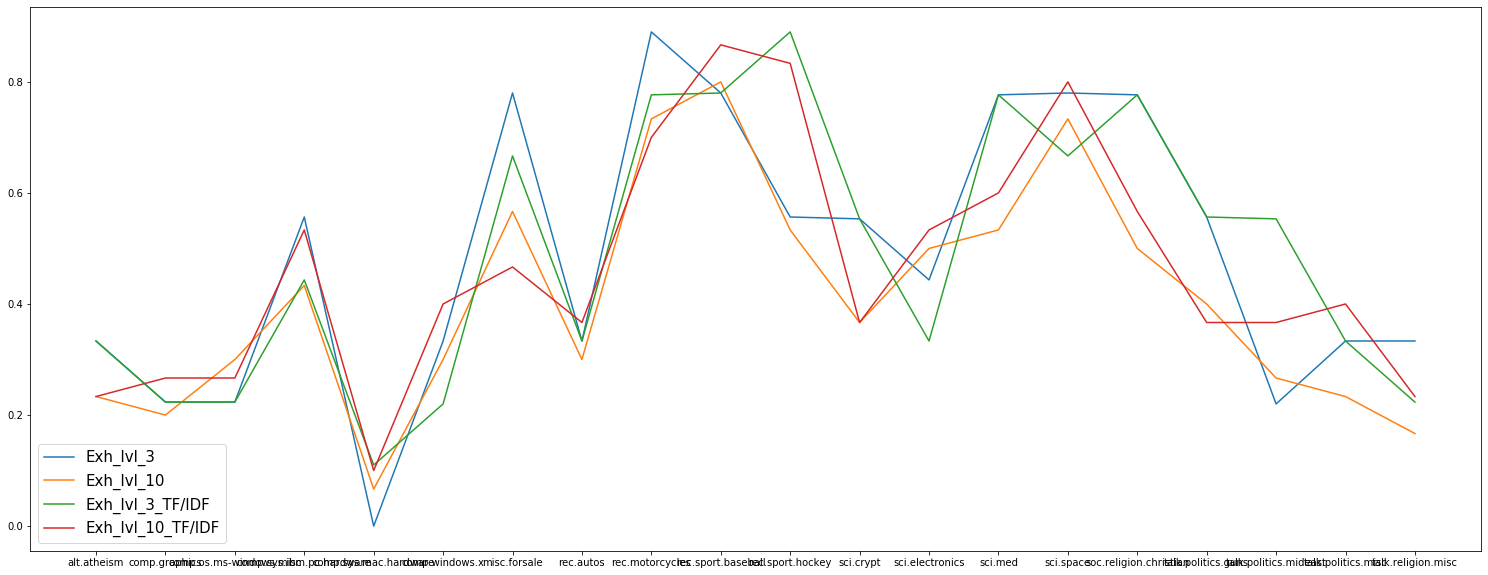

In [143]:
values = dFrame['class']
plt.figure(figsize=(26, 10))
plt.plot(values, dFrame['3'])
plt.plot(values, dFrame['10'])
plt.plot(values, dFrame_tfidf['3'])
plt.plot(values, dFrame_tfidf['10'])
plt.legend(['Exh_lvl_3', 'Exh_lvl_10','Exh_lvl_3_TF/IDF', 'Exh_lvl_10_TF/IDF'], loc='lower left', fontsize = 15)

A continnuación vamos a mostrar una consulta en la que la ponderación TF/IDF ha sido efectiva y ha ayudado a mejorar la recuperación. De la clase **rec.sport.hockey** ya mencionada, para el nivel de exhaustividad 10, el primer mensaje tiene una precisión de 0.1 con la ponderación de frecuencias mientras que con TF/IDF sube hasta 0.7.

In [39]:
def mostar_bien_clasificados(num_mensajes,indice_clase,indice_mensaje,mat_recuperados, targets, target_names):
    '''
    Imprime los mensajes recuperados para un mensaje x que no pertenecen a su misma clase
    -num_mensajes: mensajes a imprimir
    -indice_clase: indice en el que se encuentra la clase (fila) que estamos comprobando en la matriz
    -indice_mensaje: indice en el que se encuentra el mensaje (columna) de la clase que comprobamos
    -mat_recuperados: matriz con los mensajes recuperados para cada mensaje de cada clase. Debe compartir la misma 
                    disposición que los índices insertados
    -targets: lista con la clase a la que pertenece cada mensaje
    -target_names: lista con el nombre de cada clase, debe compartir la indexación de filas de la matriz
    '''
    count = 0
    print("Mensajes recuperados correctamente:")
    for i in (range(len(mat_recuperados[indice_clase][indice_mensaje]))):
        if(indice_clase == targets[mat_recuperados[indice_clase][indice_mensaje][i]]):
            #imprimimos el mensaje con que se ha confundido
            write_terms(feature_names, None, train_vector_data, mat_recuperados[indice_clase][indice_mensaje][i])
            #mostramos a qué clase pertenece en realidad
            print("Pertenece a la clase: ", target_names[targets[mat_recuperados[indice_clase][indice_mensaje][i]]])
            
            count += 1
            if(count == num_mensajes):
                break
                

In [31]:
print('Mensaje', matrix[10,0], 'vectorizado:', ma.array(feature_names, mask = ~((train_vector_data[matrix[10,0],:]>0)[0].toarray())).compressed(),'\n')

Mensaje 56 vectorizado: ['4th' 'approaching' 'article' 'assumptions' 'automatic' 'based' 'better'
 'big' 'briefly' 'charge' 'charging' 'clearer' 'combinations'
 'conceivable' 'controlled' 'corners' 'cruising' 'curve' 'delayed'
 'deliver' 'depressed' 'distraction' 'does' 'downshift' 'downshifts'
 'drive' 'driver' 'dumb' 'easily' 'economical' 'electronics' 'engr'
 'entail' 'equal' 'excellent' 'explanation' 'figure' 'gear' 'got' 'half'
 'highway' 'improvements' 'inattentive' 'instantaneous' 'keywords' 'know'
 'legacy' 'lift' 'like' 'limiter' 'lines' 'makes' 'manual' 'manuals'
 'measure' 'mileage' 'obvious' 'open' 'opening' 'organization' 'pedal'
 'people' 'position' 'possible' 'posting' 'previous' 'proper' 'proved'
 'quite' 'ratio' 'readout' 'really' 'red' 'remain' 'remember' 'revs'
 'revving' 'ridden' 'right' 'scenario' 'senses' 'sets' 'sight' 'simple'
 'sits' 'situation' 'speed' 'sport' 'stick' 'stored' 'subject' 'sure'
 'suspect' 'switch' 'switches' 'things' 'think' 'throttle' 'times'


El vector del mensaje no parece muy concreto o identificativo de su clase ya que cuenta con keywords que refieren facilmente a otras clases como: 'electronics', 'economical', 'transmissions'. Y otros términos que aportan ambigüedad como 'way', 'want', 'like'. Aún así si pertenece a dicha clase es porque contiene términos relacionados con la misma como 'sport', 'stick'o 'half'.

Esta descripción nos ayuda a entender los malos resultados con la anterior bolsa de palabras y, sin embargo, con la ponderación TF/IDF su precisión se ha visto mejorada. Queremos saber el estilo de los mensajes que ha recuperado correctamente y los que ha recuperado erroneamente para poder ver cómo ha afectado esta ponderación y qué términos son realmente identificativos y han permitido la mejora en los resultados de precisión.

In [40]:
mostar_bien_clasificados(7,10,0,recupera10_tfidf,train_data.target,train_data.target_names)

Mensajes recuperados correctamente:
Mensaje 3664 vectorizado: ['absolutely' 'al' 'artist' 'astonished' 'attempts' 'bad' 'banjo' 'bench'
 'capital' 'caps' 'centers' 'cheap' 'comes' 'competition' 'continue'
 'couldn' 'crap' 'crowd' 'defensive' 'difficult' 'district' 'ends'
 'figure' 'forwards' 'game' 'games' 'getting' 'goal' 'goals' 'got'
 'gotten' 'hit' 'ice' 'year' 'years' 'inconsistent' 'instead' 'isles'
 'justification' 'later' 'letting' 'level' 'lines' 'maybe' 'make' 'makes'
 'meet' 'minds' 'need' 'neutral' 'opposing' 'opposition' 'organization'
 'penalty' 'penalties' 'period' 'pilon' 'play' 'playoffs' 'police' 'pour'
 'probably' 'remember' 'rest' 'resulting' 'right' 'round' 'sail' 'scored'
 'senseless' 'settling' 'ship' 'shot' 'skater' 'skates' 'software'
 'somebody' 'space' 'stay' 'stupid' 'subject' 'takes' 'talent' 'team'
 'teams' 'think' 'tight' 'tilts' 'tonite' 'turnover' 'understand' 'wish'
 'world' 'worse' 'worst' 'zone'] 

Pertenece a la clase:  rec.sport.hockey
Mensaje 3162

Palabras clave como 'organization' o 'lines'(refiere a la defensa: In ice hockey, a line is a group of forwards that play in a group, or "shift", during a game) aparecen en gran parte de los mensajes y dan una razón a la similitud, **sin embargo otras, como 'got', 'posting' o 'article' tienen menos presencia pero ayudan a la identificación también de mensajes de esta clase**.<br>Aquí es donde podemos observar la efectividad de la ponderación TF/IDF ya que estos términos que son relativamente frecuentes en esta clase, es muy probable que no lo sean en el corpus en general. Así tienen una mayor ponderación y su presencia en el documento permite su asociación entre textos semejantes ya que los valores del cálculo de la similitud del coseno se ven favorecidos por la presencia de éstos términos.

Como mostramos a continuación, la ponderación anterior perjudicó a la hora de la recuperación debido a que, por ejemplo, 'organization' o 'lines' resultan ser términos con bastante frecuencia, no solo en la clase anterior, si no en el corpus (al parecer en la clase religión) y su presencia le daba un mayor valor a la similitud, y otros términos que podrían resultar clave ponderaban con menos valor por ser frecuentes solo en esta clase.

In [42]:
mostar_mal_clasificados(5,10,0,recupera_10,train_data.target,train_data.target_names)

Mensajes mal recuperados:
Mensaje 721 vectorizado: ['blessed' 'hear' 'yea' 'lines' 'organization' 'posting' 'promise' 'said'
 'software' 'subject'] 

Pertenece a la clase:  talk.religion.misc
Mensaje 721 vectorizado: ['blessed' 'hear' 'yea' 'lines' 'organization' 'posting' 'promise' 'said'
 'software' 'subject'] 

Pertenece a la clase:  talk.religion.misc
Mensaje 9771 vectorizado: ['ago' 'allow' 'dept' 'emulator' 'group' 'helps' 'info' 'lines'
 'organization' 'posting' 'said' 'stat' 'subject'] 

Pertenece a la clase:  comp.os.ms-windows.misc
Mensaje 6510 vectorizado: ['ad' 'communications' 'generic' 'guess' 'lines' 'makes' 'organization'
 'posting' 'reply' 'research' 'said' 'seller' 'subject'] 

Pertenece a la clase:  rec.autos
Mensaje 8935 vectorizado: ['backing' 'broadcast' 'cites' 'clearly' 'didn' 'enclosed' 'know' 'liar'
 'lines' 'local' 'message' 'newsreader' 'organization' 'said' 'stations'
 'subject' 'surrender' 'tin' 'writes'] 

Pertenece a la clase:  talk.religion.misc
